In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Read the input file and check the data dimension

In [2]:
german=pd.read_csv("german_credit.csv")

In [3]:
german.shape

(1000, 21)

In [4]:
german.columns

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

In [5]:
german.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [6]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [7]:
from sklearn.model_selection import train_test_split
g1,g2 = train_test_split(german, test_size=0.5, random_state = 101)

In [8]:
g1.shape

(500, 21)

In [9]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [10]:
# Print Shape of model data

In [11]:
german_model= pd.get_dummies(g1, columns=['account_check_status', 'credit_history', 'purpose', 'savings', 'present_emp_since', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job', 'telephone', 'foreign_worker'])

In [12]:
german_df = german_model.drop(['default'], axis = 1)

In [13]:
german_df.shape

(500, 61)

### Check for highly correlated variables but don't required any treatment for this use case

In [14]:
german.corr()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
default,1.000000,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015
duration_in_month,0.214927,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834
credit_amount,0.154739,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142
installment_as_income_perc,0.072404,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207
present_res_since,0.002967,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643
age,-0.091127,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201
credits_this_bank,-0.045732,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667
people_under_maintenance,-0.003015,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000


In [15]:
#credits_this_bank and people_under_maintenance have correlation <0.1 i.e are highly correlated.

### Drop the original variables which are converted to dummy

In [16]:
german= german.drop(['account_check_status', 'credit_history', 'purpose', 'savings', 'present_emp_since', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job', 'telephone', 'foreign_worker'], axis = 1)
german.shape

(1000, 8)

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [17]:
X = german.drop(['default'], axis = 1)
Y = german['default']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [18]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)

In [19]:
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], d

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(Y_test,y_pred))

[[190  14]
 [ 70  26]]


In [21]:
print(accuracy_score(Y_test, y_pred))

0.72


### Q6 Show the list of the features importance( 1 Marks)

In [22]:
# Calculate feature importances
importances = model.feature_importances_

In [23]:
for idx, col_name in enumerate(X_train.columns):
    print("Thefeature_importances for {} is {}".format(col_name, importances [idx]))

Thefeature_importances for duration_in_month is 0.19611921149899306
Thefeature_importances for credit_amount is 0.3363409442931115
Thefeature_importances for installment_as_income_perc is 0.06862373924029289
Thefeature_importances for present_res_since is 0.07809127101576097
Thefeature_importances for age is 0.247650560924949
Thefeature_importances for credits_this_bank is 0.0470612734504691
Thefeature_importances for people_under_maintenance is 0.02611299957642351


In [24]:
import matplotlib.pyplot as plt

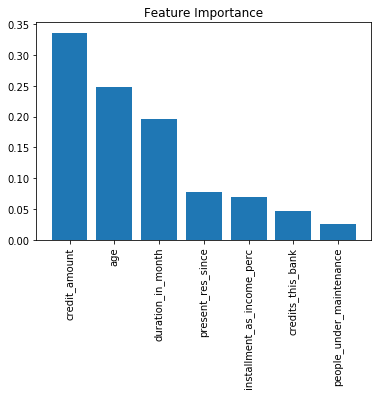

In [25]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [26]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [27]:
# Use below values
num_folds = 10
seed = 77

In [28]:
#Validate the Random Forest model build above using k fold

In [29]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [30]:
array_german_credit = german.values
X2 = array_german_credit[:,1:8]
Y2 = array_german_credit[:,0]
# feature extraction
scores = []
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=False)
for train_index, test_index in kfold.split(X2):
    X2_train, X2_test, y2_train, y2_test = X2[train_index], X2[test_index], Y2[train_index], Y2[test_index]
    scores.append(get_score(RandomForestClassifier(n_estimators = 500, n_jobs = 2, criterion = "entropy", random_state = 9999), X2_train, X2_test, y2_train, y2_test))
scores

[0.78, 0.67, 0.68, 0.75, 0.74, 0.62, 0.71, 0.77, 0.67, 0.7]

In [31]:
#Calculate Mean score

In [32]:
print(np.mean(scores))

0.7090000000000001


In [33]:
# Calculate score standard deviation using std()

In [34]:
print(np.std(scores))

0.04825971404805461


# Q8 Print the confusion matrix( 1 Marks)

In [35]:
from sklearn.model_selection import cross_val_predict
y_predict = cross_val_predict(RandomForestClassifier(n_estimators = 500, n_jobs = 2, criterion = "entropy", random_state = 9999), X2, Y2, cv=10)

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("Confusion Matrix:\n", confusion_matrix(Y2, y_predict))

Confusion Matrix:
 [[628  72]
 [218  82]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [37]:
print("Accuracy:", accuracy_score(Y2, y_predict)) #percentage of correct predictions

Accuracy: 0.71


In [38]:
from sklearn.metrics import classification_report  
print(classification_report(Y2, y_predict))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81       700
           1       0.53      0.27      0.36       300

    accuracy                           0.71      1000
   macro avg       0.64      0.59      0.59      1000
weighted avg       0.68      0.71      0.68      1000



In [39]:
#precision and recall are 74% and 90% respectively.

# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [40]:
#Hint: Use roc_curve

In [41]:
from sklearn import metrics

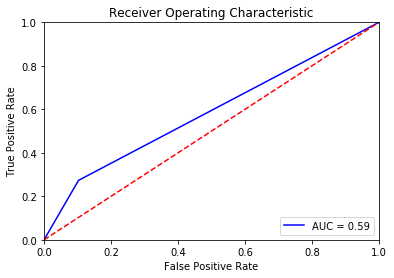

In [42]:
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X2)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y2, y_predict)
roc_auc = metrics.auc(fpr, tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [43]:
print("The AUC is:",metrics.auc(fpr, tpr))

The AUC is: 0.5852380952380953


### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [ ]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [ ]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [ ]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())